# Business Case

As e-commerce continues to dominate retail, understanding the factors that influence customer purchasing behavior is critical for businesses aiming to enhance profitability. By leveraging a dataset of over 12,000 online shopping sessions, our project seeks to develop a predictive model that identifies key indicators of purchasing intentions. Once developed, companies will be able to leverage this model in order to target advertisements and incentives more effectively, converting fringe customers to paying ones and ultimately driving profits.


In [ ]:
# Import Dataset and Packages

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from google.colab import files
uploaded = files.upload()

import io
file_key = list(uploaded.keys())[0]
customer_data = pd.read_csv(io.BytesIO(uploaded[file_key]))

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
# Explore the Data

customer_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [ ]:
# Recode Boolean Values

customer_data['Weekend'] = customer_data['Weekend'].astype(int)
customer_data['Revenue'] = customer_data['Revenue'].astype(int)

In [ ]:
customer_data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

<Axes: >

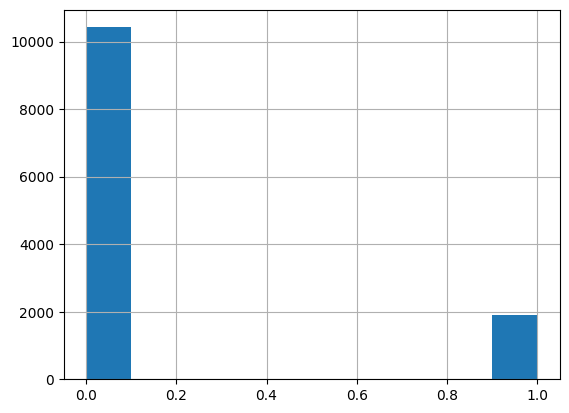

In [ ]:
# Exploratory Analyses
# Evaluate Target Variable Distribution

customer_data.Revenue.hist()

<Axes: >

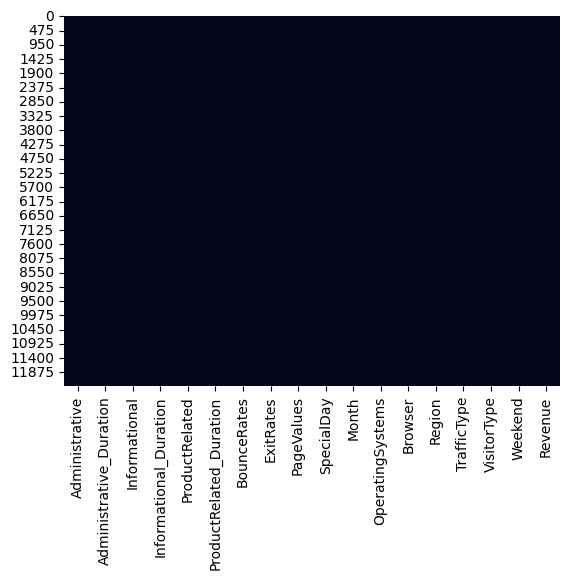

In [ ]:
# Explore Missing Values

sns.heatmap(customer_data.isnull(), cbar=False)

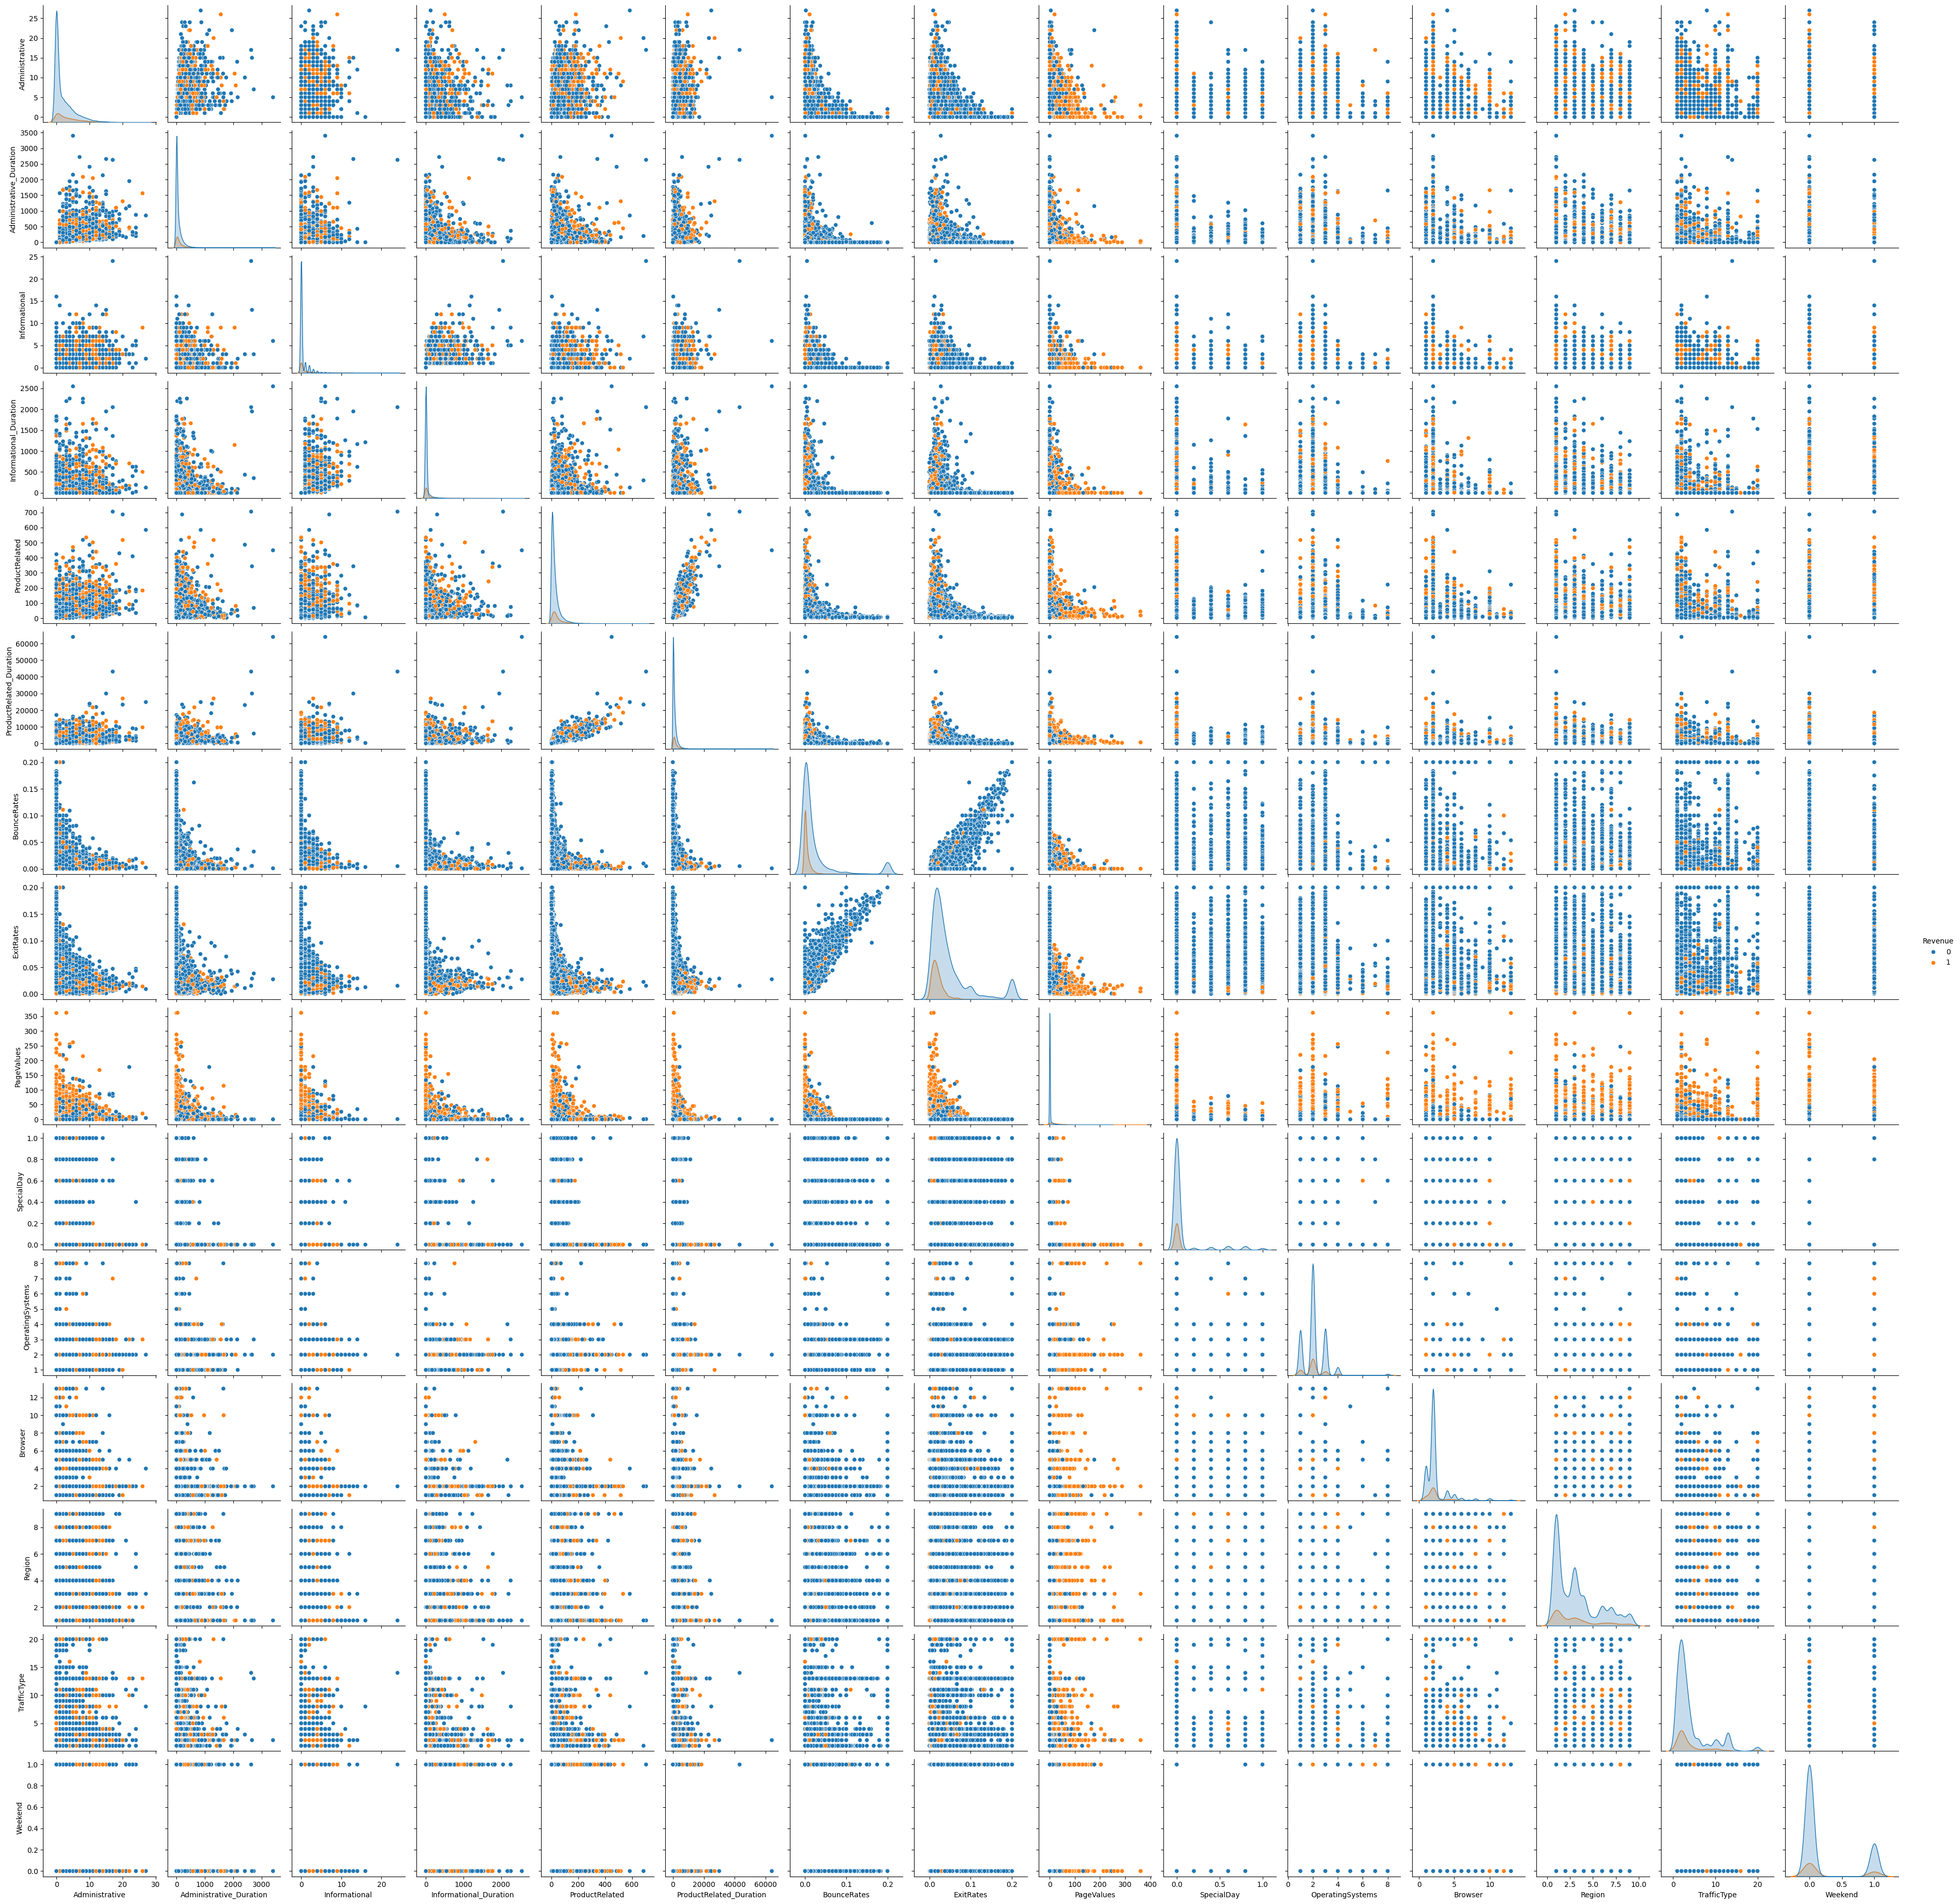

In [ ]:
# Explore Pairplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(customer_data, hue='Revenue')

In [ ]:
# Recode Month Variable
customer_data['Month'] = customer_data['Month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})

In [ ]:
# Recode Visitor Type Variable
customer_data['VisitorType'] = customer_data['VisitorType'].map({'Returning_Visitor':1, 'New_Visitor':2, 'Other':3})

In [ ]:
# Explore Correlations

df = pd.DataFrame(customer_data)
df.corr(numeric_only=True)['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Month                      0.127372
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
VisitorType                0.098485
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [ ]:
# Drop Low Correlation Variables from Dataset

customer_data_clean = customer_data.drop(['Administrative_Duration', 'Informational', 'Informational_Duration', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'VisitorType'], axis=1)

In [ ]:
# Variables to Include in Models
customer_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   ProductRelated           12330 non-null  int64  
 2   ProductRelated_Duration  12330 non-null  float64
 3   BounceRates              12330 non-null  float64
 4   ExitRates                12330 non-null  float64
 5   PageValues               12330 non-null  float64
 6   Month                    12330 non-null  int64  
 7   Revenue                  12330 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 770.8 KB


In [ ]:
# Convert Target Variable to Categorical Variable

customer_data_clean['Revenue'] = customer_data_clean['Revenue'].astype('category')

# Logistic Regression


In [ ]:
X = customer_data.drop('Revenue', axis=1)
y = customer_data['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.67


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3149
           1       0.71      0.36      0.48       550

    accuracy                           0.88      3699
   macro avg       0.80      0.67      0.71      3699
weighted avg       0.87      0.88      0.87      3699



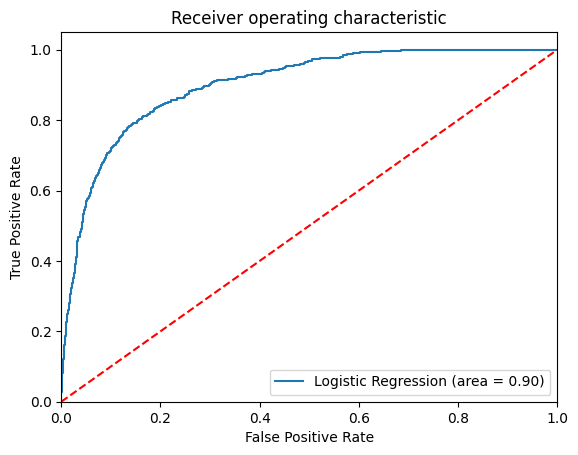

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# kNN Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
X_rescaled.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         0.085747                 0.023779       0.020982   
std          0.123029                 0.052013       0.052923   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.037037                 0.002207       0.000000   
75%          0.148148                 0.027438       0.000000   
max          1.000000                 1.000000       1.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                 0.013522        0.045009                 0.018676   
std                  0.055209        0.063086                 0.029913   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        0.009929                 0.002878   
50%                  0.000000        0.025532                 0.009362   
75%                  0.000000        0.053901                 0.022887   
max                  1.000000        1.000000                 1.000000   

        BounceRates     ExitRates    PageValues    SpecialDay         Month  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.110957      0.215364      0.016279      0.061427      0.565199   
std        0.242442      0.242983      0.051328      0.198917      0.339284   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.071429      0.000000      0.000000      0.300000   
50%        0.015562      0.125782      0.000000      0.000000      0.500000   
75%        0.084063      0.250000      0.000000      0.000000      0.900000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           0.160572      0.113091      0.268421      0.161557   
std            0.130189      0.143106      0.300199      0.211851   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.142857      0.083333      0.000000      0.052632   
50%            0.142857      0.083333      0.250000      0.052632   
75%            0.285714      0.083333      0.375000      0.157895   
max            1.000000      1.000000      1.000000      1.000000   

        VisitorType       Weekend  
count  12330.000000  12330.000000  
mean       0.075588      0.232603  
std        0.188495      0.422509  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

# Find Optimum k-Value

In [ ]:
# Determine the optimal value of k based on ROC AUC using cross-validation
max_K = 100
cv_scores = []

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="roc_auc")
    cv_scores.append(scores.mean())

<Axes: >

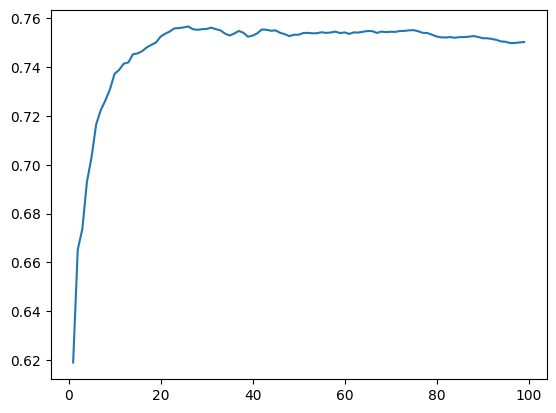

In [ ]:
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
cv_scores[:4]

[0.6189801833873653,
 0.6651912984354902,
 0.6736878781050086,
 0.6930740587098745]

In [ ]:
# Find the index of the maximum ROC AUC value
import numpy as np
optimal_k_index = np.argmax(cv_scores)

# Retrieve the optimal k value
optimal_k = optimal_k_index + 1  # Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1

# Retrieve the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]

# Print the results
print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)

Optimal k for maximum ROC AUC: 26
Maximum ROC AUC: 0.7567224844181141


# Optimized kNN Model with Optimal K Value=26

In [ ]:
knn = KNeighborsClassifier(n_neighbors=26, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3143    6]
 [ 519   31]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3149
           1       0.84      0.06      0.11       550

    accuracy                           0.86      3699
   macro avg       0.85      0.53      0.51      3699
weighted avg       0.86      0.86      0.80      3699



In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.5272291347902653


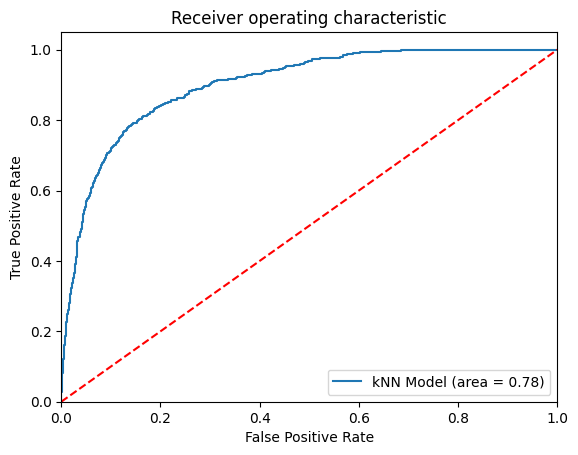

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3149
           1       0.79      0.47      0.59       550

    accuracy                           0.90      3699
   macro avg       0.85      0.73      0.77      3699
weighted avg       0.90      0.90      0.89      3699



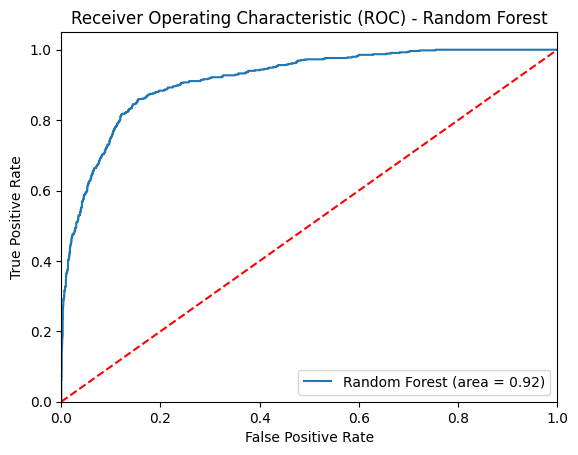

Random Forest ROC AUC: 0.9157


In [ ]:
# Import necessary metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC AUC score for Random Forest
#rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

# Calculate the ROC curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for a random model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Print the ROC AUC score
print(f"Random Forest ROC AUC: {rf_roc_auc:.4f}")


#Boosted Tree Model

In [ ]:
# Import necessary libraries for data splitting
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[3018  131]
 [ 279  271]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3149
           1       0.67      0.49      0.57       550

    accuracy                           0.89      3699
   macro avg       0.79      0.73      0.75      3699
weighted avg       0.88      0.89      0.88      3699



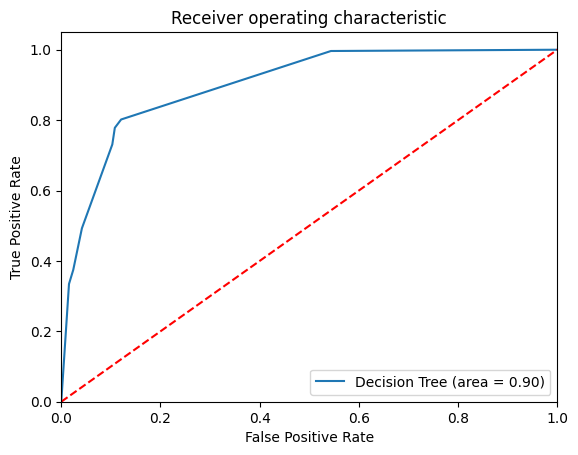

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


#Naive Bayes

In [ ]:
#Developing Naive Bayes

# Apply a transformation to ensure non-negative values
!pip install numpy
import numpy as np
from sklearn.naive_bayes import MultinomialNB
X_train_transformed = np.abs(X_train)

# Fit the model with the transformed data
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train_transformed, y_train)

y_pred = delays_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
# Print the ROC AUC score
print(f"Naive Bayes ROC AUC: {nb_roc_auc:.4f}")

[[3147    2]
 [ 543    7]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3149
           1       0.78      0.01      0.03       550

    accuracy                           0.85      3699
   macro avg       0.82      0.51      0.47      3699
weighted avg       0.84      0.85      0.79      3699

Naive Bayes ROC AUC: 0.8148


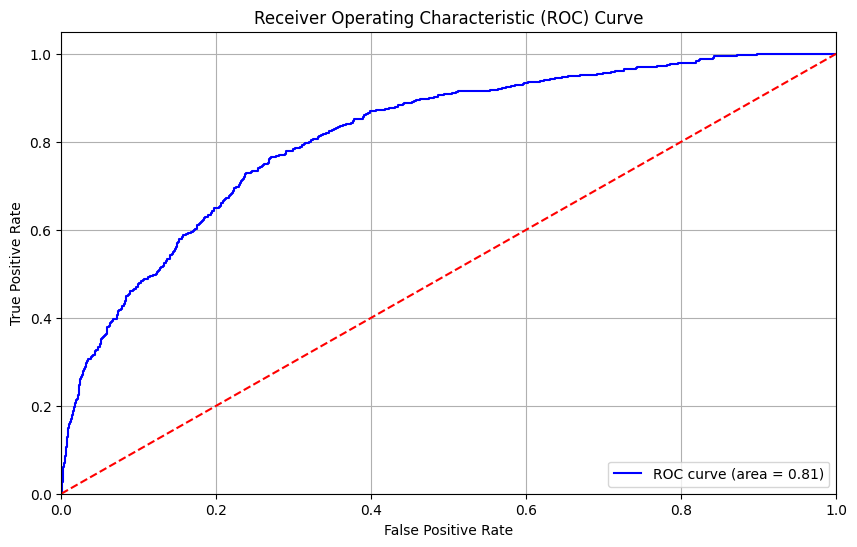

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, delays_nb.predict_proba(X_test)[:, 1])

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Artificial Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

[[3059   90]
 [ 332  218]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3149
           1       0.71      0.40      0.51       550

    accuracy                           0.89      3699
   macro avg       0.80      0.68      0.72      3699
weighted avg       0.87      0.89      0.87      3699

ROC AUC:  0.8952325413551199


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


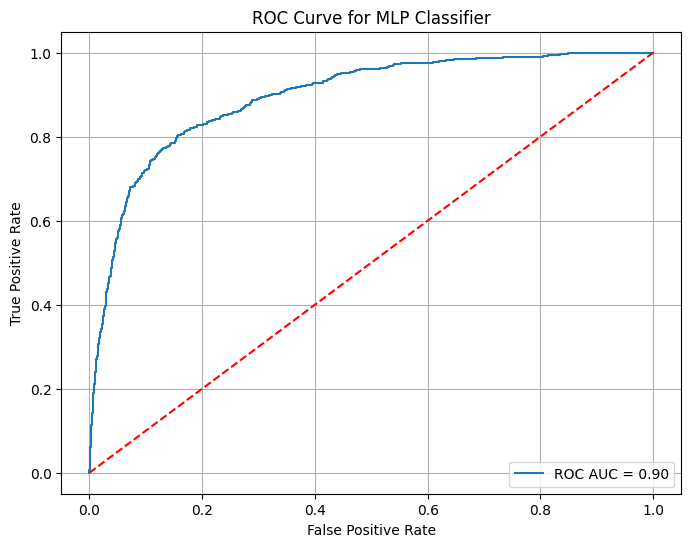

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = MLPC_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
#Assess the effect of the number of hidden nodes (5-30) on model accuracy.

from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,1):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1,max_iter=4000)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [ ]:
sns.lineplot(x=range(min_hidden_layer_size,max_hidden_layer_size,1), y=cv_scores)


In [ ]:
# Find the optimal number of nodes
optimal_nodes_index = np.argmax(cv_scores)  # Index of the maximum average cross-validation accuracy
optimal_nodes = min_hidden_layer_size + optimal_nodes_index * 1  # Convert index to corresponding number of nodes
optimal_accuracy = cv_scores[optimal_nodes_index]

print(f'Optimal Number of Hidden Nodes: {optimal_nodes}')
print(f'Accuracy with Optimal Number of Hidden Nodes: {optimal_accuracy}')

# Improve the model with the Optimal number(6) of Hidden Nodes

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=6, activation='logistic', solver='adam', random_state=1, max_iter=4000)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = MLPC_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ANN_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {ANN_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Performance of each model on the basis of ROC AUC curve

In [ ]:
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr, tpr, label='Boosted tree (area = %0.2f)' % dt_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % kNN_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Assessing the Performance of Each Model

**ONLINE SHOPPERS INTENTION**

**Logistic Regression Model:**
Logistic Regression demonstrated good overall accuracy at 88%, with high precision and recall for class 0 (non-revenue cases). However, its performance on class 1 (revenue cases) was weaker, with a moderate precision of 0.71 but a low recall of 0.36. This suggests the model struggles to capture true positives in the minority class effectively. The ROC AUC of 0.90 indicates strong discrimination ability overall, though its lower recall for the revenue class limits its effectiveness in balanced classification.



**kNN Model:**
The K-Nearest Neighbors (KNN) model reached an 86% accuracy, with nearly perfect recall for the majority class. However, it performed poorly on the minority class, with a recall of only 0.06 and a very low F1-score of 0.11, highlighting that it misses most revenue cases. This model’s bias toward the majority class makes it unsuitable for applications where identifying the minority class is critical. The ROC AUC score of 0.78 confirms that KNN lacks the balance needed for effective classification across both classes.


**Random Forest Model:**
Random Forest achieved the highest overall accuracy at 90% and balanced performance across both classes. It demonstrated excellent precision and recall for class 0, while also providing reasonable precision (0.79) and improved recall (0.47) for the minority class, yielding an F1-score of 0.59 for revenue cases. The high ROC AUC of 0.92 reflects Random Forest’s strong classification ability, making it one of the best choices for this dataset due to its robust handling of both classes and effective feature selection.

**Boosted Tree Model:**
The Boosted Tree model also showed strong performance, with 89% accuracy and high precision and recall for the majority class. However, its lower recall of 0.49 for the minority class suggests it does not capture revenue cases as effectively as Random Forest. Its ROC AUC of 0.90 indicates good discriminatory power, but it slightly underperforms in handling class 1 compared to Random Forest, making it a close but secondary choice.


**Naive Bayes Model:**
Naïve Bayes, with an 85% accuracy, showed high performance for class 0 with perfect recall but struggled significantly with class 1, resulting in a low F1-score of 0.03 and an ROC AUC of 0.81. This model’s high bias toward the majority class limits its usefulness in cases where balanced classification is needed, as it consistently fails to identify revenue cases accurately.


**Artificial Neural Network (ANN):**
The Artificial Neural Network (ANN) model achieved 89% accuracy with strong performance on the majority class and moderate handling of the minority class. It achieved an F1-score of 0.55 for class 1 with a recall of 0.45, suggesting reasonable balance but slightly lower performance than Random Forest. Its ROC AUC of 0.90 indicates good overall performance, though it does not surpass Random Forest in distinguishing between classes.


**Best Performer:** Overall, Random Forest is the most effective model for this dataset. Its high ROC AUC of 0.92 and balanced metrics across both classes make it the most suitable choice, as it consistently identifies both non-revenue and revenue cases effectively while minimizing misclassification.

